In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

In [3]:
data = pd.read_csv("Hitters.csv")
df = data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
df.fillna(df["Salary"].mean(), inplace = True)

In [7]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [8]:
lbe = LabelEncoder()

In [9]:
df["League"] = lbe.fit_transform(df["League"])

In [10]:
df["Division"] = lbe.fit_transform(df["Division"])
df["NewLeague"] = lbe.fit_transform(df["NewLeague"])

In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,535.925882,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000000,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.000000,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.500000,1


## Model Oluşturma

In [12]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
pca = PCA()

In [89]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [90]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10]

array([39.59, 61.1 , 71.52, 79.41, 84.67, 89.12, 92.6 , 95.12, 96.53,
       97.49])

In [91]:
lm = LinearRegression()

In [92]:
pcr_model = lm.fit(X_reduced_train, y_train) # Tüm bileşeneri kullanarak fit etme

## Tahmin Etme

In [93]:
y_pred_train = pcr_model.predict(X_reduced_train)

In [94]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

293.1518157544788

In [95]:
pca2 = PCA()

In [96]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [97]:
y_pred_test = pcr_model.predict(X_reduced_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

375.6905967470883

## Model Tuning

In [99]:
cv10 = KFold(n_splits=10, shuffle=True, random_state=1)
lm = LinearRegression()

In [100]:
RMSE = []

In [101]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*cross_val_score(lm, 
                                       X_reduced_train[:,:i], 
                                       y_train.ravel(), 
                                       cv=cv10, 
                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

Text(0, 0.5, 'RMSE')

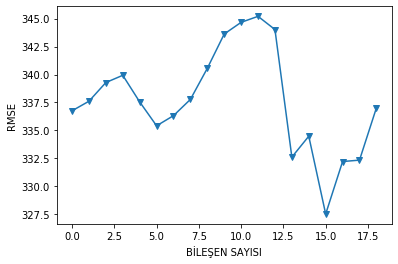

In [102]:
plt.plot(RMSE, "-v")
plt.xlabel("BİLEŞEN SAYISI")
plt.ylabel("RMSE")

In [104]:
#Final Modeli
pcr_model = lm.fit(X_reduced_train[:,:15], y_train)

In [105]:
y_pred = pcr_model.predict(X_reduced_test[:,:15])

In [106]:
np.sqrt(mean_squared_error(y_test, y_pred))

364.54230566558334

# PLS

## Model

In [114]:
pls_model = PLSRegression().fit(X_train, y_train)

## Tahmin

In [115]:
y_pred = pls_model.predict(X_test)

In [116]:
np.sqrt(mean_squared_error(y_test, y_pred))

330.3604813323237

## Model Tuning

In [117]:
cv10 = KFold(n_splits=10, shuffle=True, random_state=1)

In [118]:
RMSE = []
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, 
                                       X_train, 
                                       y_train, 
                                       cv=cv10, 
                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

Text(0, 0.5, 'RMSE')

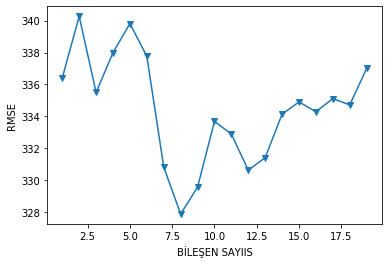

In [119]:
plt.plot(np.arange(1,X_train.shape[1]+1), np.array(RMSE), "-v")
plt.xlabel("BİLEŞEN SAYIIS")
plt.ylabel("RMSE")

In [121]:
pls_model = PLSRegression(n_components=8).fit(X_train, y_train)

In [122]:
y_pred = pls_model.predict(X_test)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.1169571777152